In [1]:
import numpy as np
import os
import argparse
from PIL import Image, ImageOps
from keras.preprocessing.image import img_to_array
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
from keras import backend as K

Using TensorFlow backend.


In [2]:
from code.unet.model import unet

In [34]:
import os
import math

In [111]:
class LungSegmentationDataSet():
    # Data Generator
    # 1. Read Image and annotations.
    # 2. Preprocess image like resize and normalize
    # 3. Data Augmentation
    # 4. Create a batch
    # 5. Yield the batch

    def __init__(self, args):
        self.args = args
        self.root_dir = "data/Lung_Segmentation"

    def get_data(self):
        data = []
        annotations_path = os.path.join(self.root_dir, "annotations")
        annotations_files = os.listdir(annotations_path)
        print("list of annotations_files: {}".format(annotations_files))

        for annotation_filename in annotations_files:
            annotation_path = os.path.join(
                annotations_path, annotation_filename)
            f = open(annotation_path, 'r')
            annotations = f.readlines()
            data += annotations
            f.close()
        return data

    def preprocess_image(self, path):
        im = Image.open(path)
        im = ImageOps.grayscale(im)
        im = im.resize((self.args["height"], self.args["width"]))  # parameterize height and width
        img = img_to_array(im)
        img = img/255.
        return img

    def generator(self, samples):
        input_batch = []
        output_batch = []
        batch_size = self.args["batch_size"]

        for line in samples:
            image_name = line
            image_path = os.path.join(self.root_dir, "test", image_name)
            if os.path.exists(image_path):
                image = self.preprocess_image(image_path)
                mask = []
                input_batch.append(image)
                output_batch.append(mask)
                if len(input_batch) == batch_size:
                    batch_x = np.array(input_batch)
                    batch_y = np.array(output_batch)
                    input_batch = []
                    output_batch = []
                    yield (batch_x, batch_y)
            else:
                print("DOES NOT EXISTS image path: {}, mask path: {}".format(image_path))
        if input_batch and output_batch:
            batch_x = np.array(input_batch)
            batch_y = np.array(output_batch)
            input_batch = []
            output_batch = []
            yield (batch_x, batch_y)
            

In [153]:
all_images = os.listdir("data/Lung_Segmentation/test")

In [154]:
np.random.shuffle(all_images)

In [155]:
test_images = all_images[:10]

In [156]:
test_images

['CHNCXR_0196_0.png',
 'CHNCXR_0563_1.png',
 'CHNCXR_0360_1.png',
 'CHNCXR_0211_0.png',
 'CHNCXR_0359_1.png',
 'CHNCXR_0207_0.png',
 'CHNCXR_0025_0.png',
 'CHNCXR_0347_1.png',
 'CHNCXR_0483_1.png',
 'CHNCXR_0201_0.png']

In [157]:
args= {
		"batch_size": 2,
		"model_depth": 5,
		"width": 256,
		"root_filter_size": 32,
		"epochs": 100,
		"height": 256
	}

In [158]:
args

{'batch_size': 2,
 'model_depth': 5,
 'width': 256,
 'root_filter_size': 32,
 'epochs': 100,
 'height': 256}

In [159]:
test_obj = LungSegmentationDataSet(args)

In [160]:
test_generator = test_obj.generator(test_images)

In [161]:
model = unet(args["root_filter_size"], args["model_depth"], n_class=1, input_size=(args["height"], args["width"], 1))

In [162]:
model.load_weights("trained_model/best_model.h5")

In [163]:
test_steps = math.ceil(len(test_samples) / args["batch_size"])

In [164]:
test_steps

5

In [165]:
predictions=[]

In [166]:
batch_predictions = model.predict_generator(test_generator, steps=test_steps, verbose=1)
predictions.extend(batch_predictions)

5/5 [==============================] - 6s 1s/step


In [167]:
len(predictions)

10

In [67]:
from matplotlib import pyplot as plt
%matplotlib inline

In [168]:
def preprocess_image(path):
    im = Image.open(path)
    im = ImageOps.grayscale(im)
    im = im.resize((256, 256))
    img = img_to_array(im)
    return img

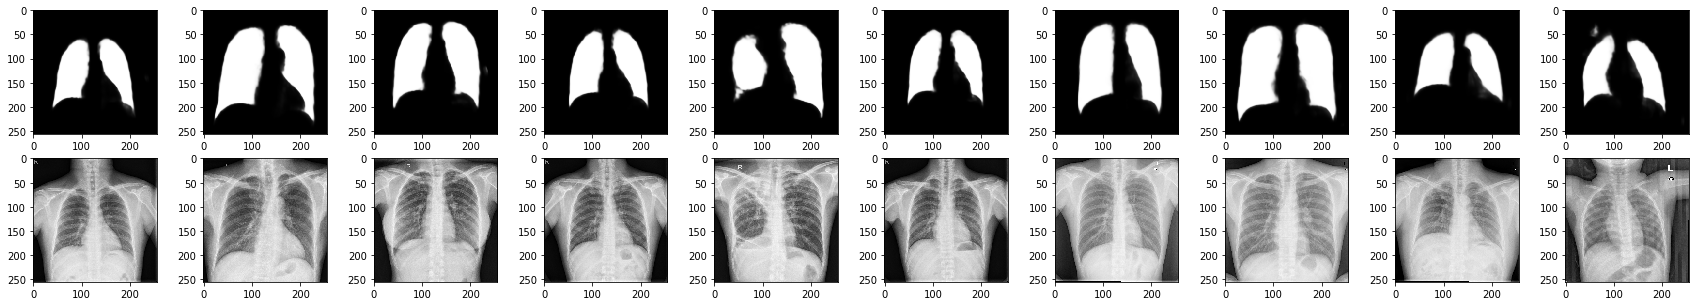

In [169]:
fig, ax = plt.subplots(nrows=2, ncols=10, figsize=(30,5))
root_path = "data/Lung_Segmentation/test"
for index, pred_mask in enumerate(predictions):
    ax[0, index].imshow(pred_mask[:,:,0],cmap="gray")
    test_img = test_images[index]
    test_img_np = preprocess_image(os.path.join(root_path, test_img))
    ax[0, index].imshow(pred_mask[:,:,0],cmap="gray")
    ax[1, index].imshow(test_img_np[:,:,0],cmap="gray")
    

In [170]:
fig.savefig("predictions.png")

In [172]:
mask_objs = []

In [174]:
for i, mask_obj in enumerate(mask_objs):
    print("mASKAS: {}".format(i))

In [175]:
label_map = []

In [176]:
[idx for idx, mask_class_present in enumerate(label_map) if mask_class_present][0]

IndexError: list index out of range

In [179]:
for idx, mask_class_present in enumerate(label_map):
    print(mask_class_present[0])